In [2]:
# importing dependencies

import requests
import json
from citipy import citipy
import numpy as np
from config_1 import key_1

In [3]:
# Get random city names using citipy library

lat = np.random.uniform(-90,90,size=1500)
lon = np.random.uniform(-180,180,size=1500)
lats_lons = zip(lat,lon)
list_lats_lons = [*lats_lons]

cities = []
for i in range(len(list_lats_lons)):
    city_name = citipy.nearest_city(lat[i],lon[i]).city_name
    if city_name not in cities:
        cities.append(city_name)

    

In [4]:
print(len(cities))

575


In [5]:
print(cities)

['thompson', 'richards bay', 'west island', 'moose jaw', 'lerwick', 'wailua homesteads', 'adamstown', 'port-aux-francais', 'iqaluit', 'yanji', 'az zubayr', 'yellowknife', 'taiohae', 'tiksi', 'cidreira', 'uturoa', 'tuy hoa', 'argo', 'puerto natales', 'ambodifotatra', 'aasiaat', 'mbandaka', 'grytviken', 'dzilam gonzalez', 'cananeia', 'waitangi', 'qamdo', 'justo daract', 'hihifo', 'albu kamal', "st. john's", 'badger', 'shebekino', 'egilsstadir', 'avarua', 'flying fish cove', 'ateli mandi', 'pocatello', 'anadyr', 'berezovyy', 'puerto baquerizo moreno', 'nova vicosa', 'utrik', 'puerto ayora', 'severnoye', 'albany', 'fort st. john', 'hobyo', 'sitka', 'talnakh', 'sao joao da barra', 'ushuaia', 'iskateley', 'port elizabeth', 'papatowai', 'whitehorse', 'colonia', 'bethel', 'ola', 'michurinsk', 'meulaboh', 'newman', 'isafjordur', 'ribeira grande', 'bredasdorp', 'caratinga', 'hawaiian paradise park', 'great falls', 'sur', 'geraldton', 'huarmey', 'dakhla', 'qaqortoq', 'queenstown', 'edinburgh of t

In [6]:
# Test url for 1 jason response

url = f'https://api.openweathermap.org/data/2.5/weather?q=bethel&appid={key_1}'
response_json_1 = requests.get(url).json()
response_json_1['wind']['speed']

5.14

In [7]:
# Extract different infos from the Weather URL using for loop

max_temp = []
humidity = []
wind_speed = []
clouds = []
latitude = []
longitude = []

for city in cities :
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={key_1}'
    reposnse_json = requests.get(url).json()
    try:
        max_temp.append(reposnse_json['main']['temp_max'])
        humidity.append(reposnse_json['main']['humidity'])
        wind_speed.append(reposnse_json['wind']['speed'])
        clouds.append(reposnse_json['clouds']['all'])
        latitude.append(reposnse_json['coord']['lat'])
        longitude.append(reposnse_json['coord']['lon'])



    except ValueError:
        max_temp.append(0)
        humidity.append(0)
        wind_speed.append(0)
        clouds.append(0)
        latitude.append(0)
        longitude.append(0)
    except KeyError:
        max_temp.append(0)
        humidity.append(0)
        wind_speed.append(0)
        clouds.append(0)
        latitude.append(0)
        longitude.append(0)



In [8]:
# Set the data extracted in a df for further Analysis

import pandas as pd
df = pd.DataFrame({'city':cities,'Latitude':latitude,'Longitute':longitude,'Temp in F':max_temp,'Humidity':humidity,'Wind Speed':wind_speed,'Clouds':clouds})
df.set_index('city',inplace=True)
df.head()

,Latitude,Longitute,Temp in F,Humidity,Wind Speed,Clouds
city,,,,,,
thompson,55.7435,-97.8558,284.24,54,2.57,75
richards bay,-28.7830,32.0377,296.67,74,5.31,0
west island,-12.1568,96.8225,300.14,78,8.23,40
moose jaw,50.4001,-105.5344,288.30,55,7.72,20
lerwick,60.1545,-1.1494,284.15,73,4.25,87


In [9]:
# Def a function that transforms Fehrenhite temp to Celcius

def to_celcius(f):
    c = (f-32)*5/9
    return c

to_celcius(60)

15.555555555555555

In [10]:
# Create a new column with the Celcius degree

df['Temp in C'] = df['Temp in F'].apply(lambda x: to_celcius(x))

In [11]:
df.head()

,Latitude,Longitute,Temp in F,Humidity,Wind Speed,Clouds,Temp in C
city,,,,,,,
thompson,55.7435,-97.8558,284.24,54,2.57,75,140.133333
richards bay,-28.7830,32.0377,296.67,74,5.31,0,147.038889
west island,-12.1568,96.8225,300.14,78,8.23,40,148.966667
moose jaw,50.4001,-105.5344,288.30,55,7.72,20,142.388889
lerwick,60.1545,-1.1494,284.15,73,4.25,87,140.083333


In [12]:
# Show the df with Latitude and Temp in C df

df[['Latitude','Temp in C']].head()

,Latitude,Temp in C
city,,
thompson,55.7435,140.133333
richards bay,-28.7830,147.038889
west island,-12.1568,148.966667
moose jaw,50.4001,142.388889
lerwick,60.1545,140.083333


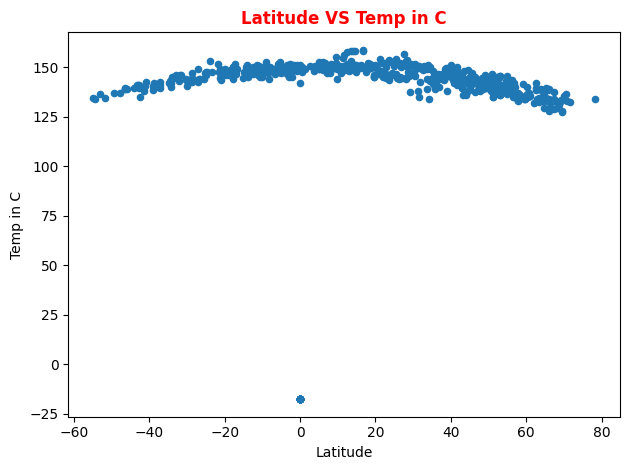

In [13]:
# Visalize the new df in a scatter plot

import matplotlib.pyplot as plt

lat_temp_df = df[['Latitude','Temp in C']]
lat_temp_df.plot(kind='scatter',x='Latitude',y='Temp in C')
plt.title('Latitude VS Temp in C',fontweight = 'bold',c='r')
plt.tight_layout()
plt.show()


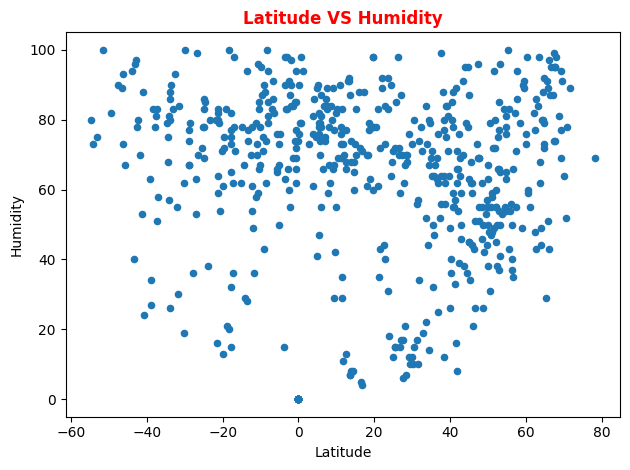

In [14]:
# Use different columsn for the visualization

lat_hum_df = df[['Latitude','Humidity']]
lat_hum_df.plot(kind='scatter',x='Latitude',y='Humidity')
plt.title('Latitude VS Humidity',fontweight = 'bold',c='r')

plt.tight_layout()
plt.show()

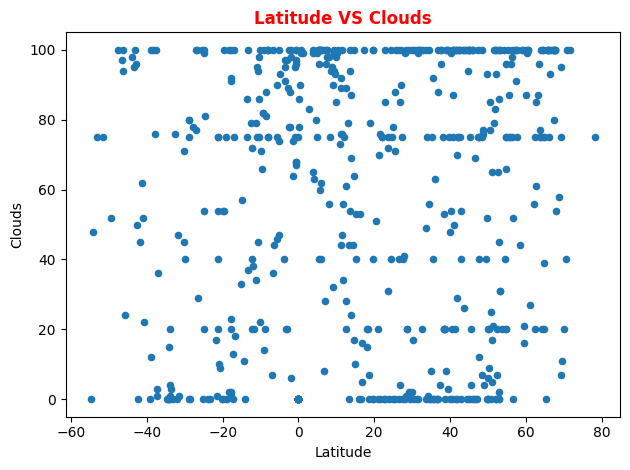

In [15]:
# Use different columsn for the visualization

lat_cloud_df = df[['Latitude','Clouds']]
lat_cloud_df.plot(kind='scatter',x='Latitude',y='Clouds')
plt.title('Latitude VS Clouds',fontweight = 'bold',c='r')

plt.tight_layout()
plt.show()

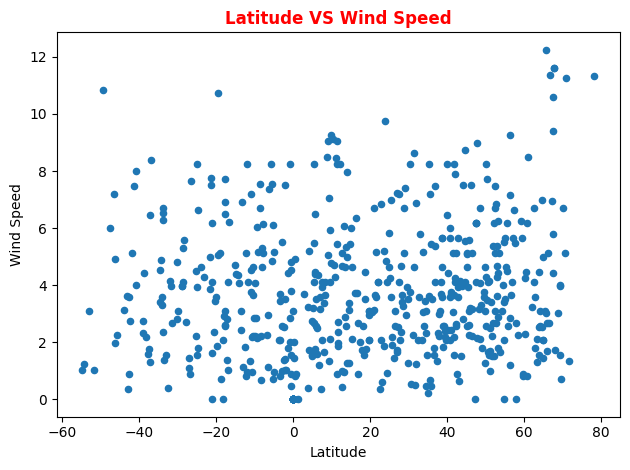

In [16]:
# Use different columsn for the visualization

lat_wind_df = df[['Latitude','Wind Speed']]
lat_wind_df.plot(kind='scatter',x='Latitude',y='Wind Speed')
plt.title('Latitude VS Wind Speed',fontweight = 'bold',c='r')

plt.tight_layout()
plt.show()

In [17]:
# Loacte all data with a positive LatitudelLongitude 

NH_df = df.loc[(df['Latitude']>0)&(df['Longitute']>0)]
NH_df.head()

,Latitude,Longitute,Temp in F,Humidity,Wind Speed,Clouds,Temp in C
city,,,,,,,
yanji,42.9075,129.5078,282.84,46,0.63,54,139.355556
az zubayr,30.3945,47.7011,305.07,15,8.23,0,151.705556
tiksi,71.6872,128.8694,270.32,89,1.33,100,132.400000
tuy hoa,13.0833,109.3000,298.45,91,0.97,79,148.027778
argo,37.6333,22.7333,292.40,56,2.33,96,144.666667


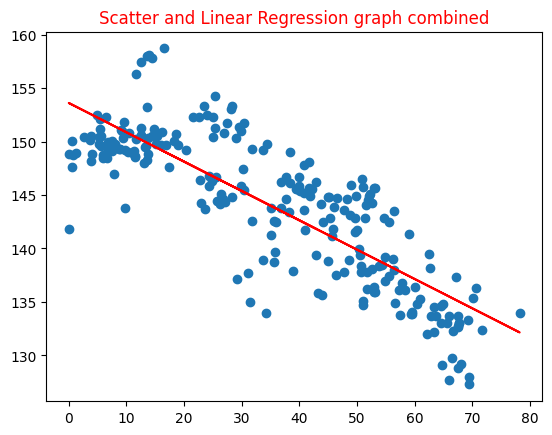

In [20]:
# Def a funtcion that can plot Scatter and Linear Regrassion graph by giving the x and y info columns

from scipy.stats import linregress

def lin_reg(x,y):


    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    y_pred = slope*x + intercept

    plt.scatter(x,y)
    plt.plot(x,y_pred,c='r')
    plt.title(f"Scatter and Linear Regression graph combined",color='r')
    return plt.show()

lin_reg(NH_df['Latitude'],NH_df['Temp in C'])
